In [10]:
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

f = open("트럼프취임연설문.txt", 'r')
lines = f.readlines()[0]
f.close()

lines[0:100]

tokenizer = RegexpTokenizer('[\w]+')
stop_words = stopwords.words('english')
words =  lines.lower()
tokens = tokenizer.tokenize(words)
# 불용어 처리
# stop_words에 있거나
stopped_tokens = [i for i in list((tokens)) if not i in stop_words]
# 1글자는 제외
stopped_tokens2 = [i for i in stopped_tokens if len(i)>1]
stopped_tokens2[:5]

['chief', 'justice', 'roberts', 'president', 'carter']

In [6]:
pd.Series(stopped_tokens2).value_counts().head(10)

america     20
american    11
people      10
country      9
one          8
nation       7
every        7
world        6
never        6
new          6
dtype: int64

In [7]:
from wordcloud import WordCloud
from collections import Counter

font_path = 'NanumBarunGothic.ttf'

wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white"
)

count = Counter(stopped_tokens2)
# wordcloud 객체 생성
wordcloud = wordcloud.generate_from_frequencies(count)

In [13]:
def __array__(self):
    """Convert to numpy array.
    Returns
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return self.to_array()

def to_array(self):
    """Convert to numpy array.
    Returns
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return np.array(self.to_image())
array = wordcloud.to_array()
array.shape

(800, 800, 3)

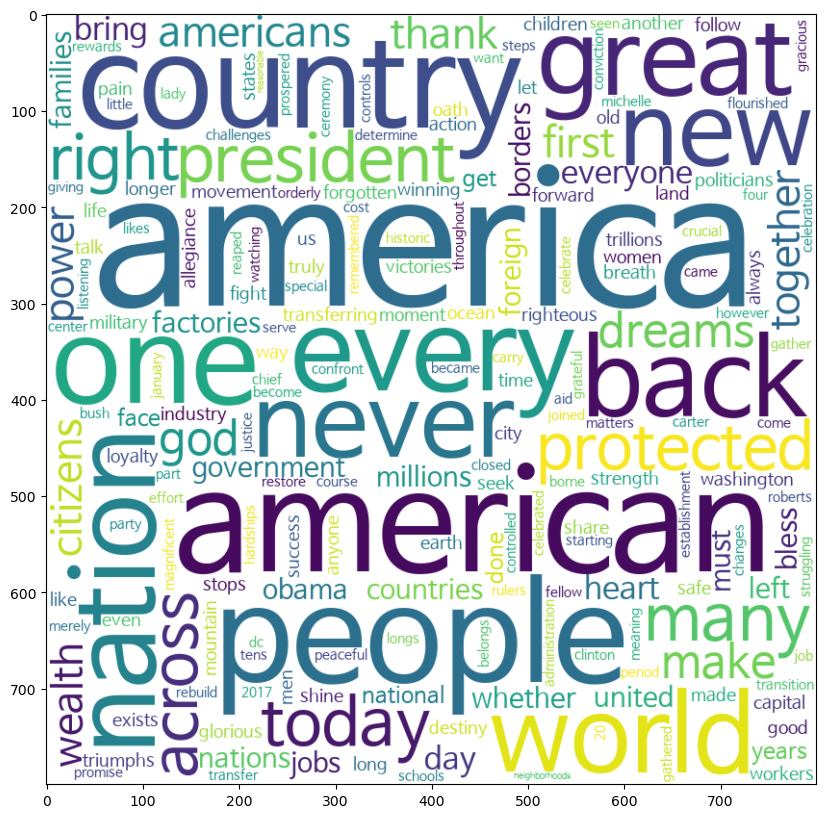

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.show()

In [ ]:
fig.savefig('wordcloud.png')